# Composite Strength

## Project Description
The dataset shows the strength of a composite as a function of its density. Build a model to predict the strength of this composite if we know its density. 

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## mporting the Data and Checking

In [2]:
dataset = pd.read_csv('Composit Strength.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset

,Strength,Density
0,3040,29.2
1,2470,24.7
2,3610,32.3
3,3480,31.3
4,3810,31.5
5,2330,24.5
6,1800,19.9
7,3110,27.3
8,3160,27.1
9,2310,24.0


In [4]:
# some checking of X and y

<font color=red> Note:<font color=blue>StandardScaler only accept the data in Matrix format. So, we need to reshape the vecctor y which is 1D array to a matrix of 25x1

In [5]:
y = y.reshape(len(y),1)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## Training the SVR Model on the Dataset
<font color=blue> Let's try different Kernels such as:<br>
    - Polynomial Kernel<br>
    - Gaussian Radial Basis Function (RBF) Kernel<br>
    - Linear Kernel,<br>
    - sigmoid Kernel,<br>

In [20]:
from sklearn.svm import SVR
#regressor = SVR(kernel = 'rbf')
#regressor = SVR(kernel = 'poly',degree=3)
#regressor = SVR(kernel = 'linear')
regressor = SVR(kernel = 'sigmoid')
regressor.fit(X, y)

C:\Users\mpanah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(kernel='sigmoid')

## Using the Model to Predict the DC Output

In [8]:
# Select a Strength and predict Density
NewX=[[4360]] 
ScaledNewX=sc_X.fit_transform(NewX) # we need to scale it
Result=regressor.predict(ScaledNewX) # we predict the output
ActualResult=sc_y.inverse_transform(Result) # the "Result" is in scale; we need to inverse it to the actual value.
print("The Density will be",ActualResult)

The Density will be [27.54102328]


## Visualising the SVR Results

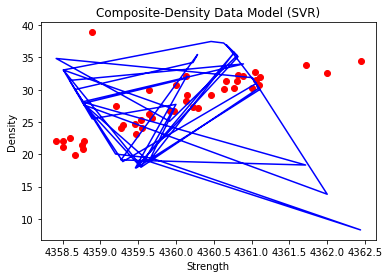

In [19]:
# Note, we need to plot the actual values not the scaled data. So, we 
#need to inverse the scaled data back to original.
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Composite-Density Data Model (SVR)')
plt.xlabel('Strength')
plt.ylabel('Density')
plt.show()